
# Semi-batch reactor



-   A semi-batch reactor is in between a batch reactor and a CSTR.
-   A typical operation is that the reactor is initially full of one reactant, and one adds the second reactant slowly
-   There is usually no outlet flow, so the volume of the reactor is not constant
-   It is a transient reactor

![img](./images/semi-batch-reactor-schematic.png "A semi-batch reactor")

-   The main reason to use a semi-batch reactor is to control reaction rate by slowly adding reactants in the feed stream
-   Assuming that $B$ is the species fed to the reactor
-   The mole balance becomes:

$ \frac{d(N_B)}{dt} = \nu C_B + r_A V $

-   All other species mole balances are the same as the batch reactor
    -   *except* that we need to account for the changing volume on the concentrations in the rate laws

-   Note, we need an equation for how the volume changes now too.
-   If the density is not a function of composition, we have $V = V_0 + \nu_0 t$
    -   or alternatively: $\frac{dV}{dt} = \nu_0$

-   Let us consider an example of $A + B \rightarrow C$
-   We start with 5 L of $A$ at a concentration of 2 mol/L in a 10 L reactor
-   We add $B$ at a rate of $0.1 L / min$ at a concentration of 2 mol/L
-   The rate law is given as $r = k C_A C_B^2$ with $k = 0.02$ L^2/mol^2/hr
-   Find the concentration of A when the reactor is full.
-   The mole balance on $A$ is:

$ \frac{d N_A}{dt} = r_A V$

-   with $N_A(t=0) = V_0 C_{A0}$
-   on $B$ we have

$\frac{d N_B}{dt} = v_0 C_{B0} + r_B  V$

-   with $N_B(t=0) = 0$
-   Assuming no change in density we have

$ \frac{dV}{dt} = v_0 $

-   with $V(t=0) = 5$ L
-   we only have 5 L of available volume, which will take 50 minutes to fill at 0.1 L/min

-   Compute the final concentrations of A and B after 50 minutes.



Ca_final = 0.7415347174976614
Cb_final = 0.7415347174976616
V_final = 9.999999999999998
[[file:pyshow/12161bc1501b601d64204ef1f9764ca6fdfe2231.png]]


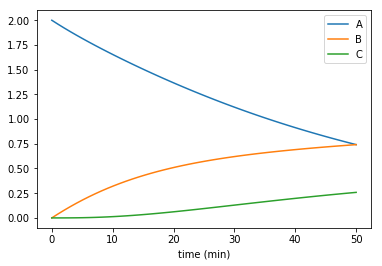

In [3]:
import numpy as np
from scipy.integrate import odeint

k = 0.02      # L^2/mol^2/hr

Ca0 = 2.0     # mol / L
Cbfeed = 2.0  # mol /L

v0 = 0.1      # L / min
V0 = 5.0      # L

# We have three ODEs
def ode(Y, t):
    Na, Nb, V = Y

    Ca = Na / V
    Cb = Nb / V
    r = k * Ca * Cb**2

    ra = -r
    rb = -r

    dNadt = ra * V
    dNbdt = v0 * Cbfeed + rb * V
    dVdt = v0
    return [dNadt, dNbdt, dVdt]

tspan = np.linspace(0, 50) # minutes
Y0 = [Ca0 * V0, 0.0, V0]
sol = odeint(ode, Y0, tspan)
Na_fin, Nb_fin, V_fin = sol[-1, :]
print('Ca_final = {0}'.format(Na_fin / V_fin))
print('Cb_final = {0}'.format(Nb_fin / V_fin))
print('V_final = {0}'.format(V_fin))

import pycse.orgmode as org
import matplotlib.pyplot as plt
NA, NB, V = sol.T

NC = Ca0 * V0 - NA

plt.plot(tspan, NA/V, tspan, NB/V, tspan, NC / V)
plt.legend(['A', 'B', 'C'])
plt.xlabel('time (min)')
plt.show()

-   How much $A$ was actually converted?
    -   $C_A$ will go down simply by dilution! We double the volume, which would cut $C_A$ in half even with no reaction

-   Initially we had 10 mol of A
-   Finally we have &asymp; 7.4 mol
    -   The difference is what reacted

-   Semibatch reactors are most often used when there are multiple reactions present, and it is advantageous to control the rate by slowly adding one reactant.




Ca_final = 0.7415347174976624
Cb_final = 0.7415347174976624
[[file:pyshow/12161bc1501b601d64204ef1f9764ca6fdfe2231.png]]


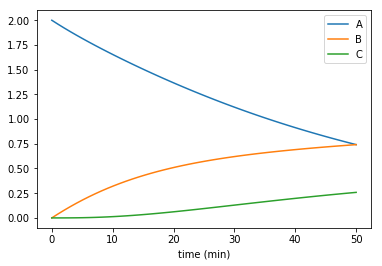

In [4]:
import numpy as np
from scipy.integrate import odeint

k = 0.02      # L^2/mol^2/hr

Ca0 = 2.0     # mol / L
Cbfeed = 2.0  # mol /L

v0 = 0.1      # L / min
V0 = 5.0      # L

# We have three ODEs
def ode(Y, t):
    Na, Nb = Y

    V = V0 + v0 * t

    Ca = Na / V
    Cb = Nb / V
    r = k * Ca * Cb**2

    ra = -r
    rb = -r

    dNadt = ra * V
    dNbdt = v0 * Cbfeed + rb * V
    return [dNadt, dNbdt]

tspan = np.linspace(0, 50) # minutes
Y0 = [Ca0 * V0, 0.0]
sol = odeint(ode, Y0, tspan)
Na_fin, Nb_fin = sol[-1, :]

V_fin = V0 + tspan[-1] * v0

print('Ca_final = {0}'.format(Na_fin / V_fin))
print('Cb_final = {0}'.format(Nb_fin / V_fin))

import pycse.orgmode as org
import matplotlib.pyplot as plt
NA, NB = sol.T

NC = Ca0 * V0 - NA

V = V0 + tspan * v0

plt.plot(tspan, NA/V, tspan, NB/V, tspan, NC / V)
plt.legend(['A', 'B', 'C'])
plt.xlabel('time (min)')
plt.show()


# Membrane reactors



-   A membrane reactor is typically like a plug flow reactor, but one reactant selectively passes across the membrane into the reactor, or a product selectively passes across the membrane, out of the reactor.

![img](./images/membrane-reactor.png)

-   The mole balance is similar to the plug flow reactor

-   We need a new term in our mole balance because there is an additional flow of material into the reactor

-   We consider the differential volume again, and in the limit of $\Delta V \rightarrow 0$ we have to know the flux across the surface of the membrane per unit volume.

$ \frac{dF_A}{dV} = r_A + R_A  $

-   where $R_A$ will be an expression for the flux across the membrane per unit volume of the reactor.
-   Similar to the case where we had a pressure drop, we need a model that describes the flux across the membrane
    -   This requires some knowledge of the transport process across the membrane
    -   For diffusion we might choose $R_A = a k_{c,A}(C_{A,s} - C_A)$
        -   where $C_A$ is the concentration of $A$ in the reactor, and $C_{A,s}$ is the concentration of $A$ outside the reactor.
        -   If $C_{A,s} > C_A$ there is a net flux of $A$ into the reactor
        -   $a$ is the surface area per unit volume (for a tubular reactor, $a=4/D$)
        -   k<sub>c,A</sub> is an overall mass transfer coefficient in m/s

-   Since we have a situation where the molar flow is changing down the length of the reactor due to transport and reaction, we have to consider the effect on the volumetric flowrate and concentrations

-   Let us consider a single reaction, $A \rightarrow B + C$, where $B$ is permeable to the walls of the reactor, and diffuses out.
-   let $k = 0.7$ 1/min, $k_b' = k_b a =  0.2$ 1/min
-   let $-r_A = k C_A$
-   the inlet molar flow is 10 mol/min at a concentration of 0.2 mol/L
-   Assume that the outside of the reactor is swept by an inert gas, so $C_{B,s} = 0$.
-   Estimate the exit concentrations at V = 400 L

-   We cannot simply relate the species by stoichiometry here, because the molar flow of $B$ is affected by reaction and transport.
-   We need a mole balances for each species
-   For species that does not cross the membrane, we use the same mole balance as a PFR.



In [5]:
import numpy as np
from scipy.integrate import odeint

k = 0.7     # rate constant  1/min
kb = 0.2    # mass transfer coefficent * a  1/min

Ca0 = 0.2   # mol / L
Fa0 = 10.0  # mol / min
Ft0 = Fa0   # Fb0, Fc0 = 0

v0 = Fa0 / Ca0  # inlet volumetric flow

Cbs = 0.0    # concentration of B outside shell


def dFdV(F, V):
    Fa, Fb, Fc = F     # unpack the variables
    Ft = Fa + Fb + Fc  # compute total molar flow

    v = v0 * Ft / Ft0  # compute corrected volumetric flowrate
    Ca = Fa / v        # compute concentrations
    Cb = Fb / v
    ra = -k * Ca       # compute reaction rate
    rb = -ra
    rc = -ra
    Rb = kb * (Cbs - Cb)  # rate of mass transfer across shell

    # define the mole balances
    dFadV = ra
    dFbdV = rb + Rb
    dFcdV = rc
    return [dFadV, dFbdV, dFcdV]

Vspan = np.linspace(0.0, 400.0)  # liters
F0 = [Fa0, 0, 0]
sol = odeint(dFdV, F0, Vspan)
Faexit, Fbexit, Fcexit = sol[-1, :]
print('''Fa_exit = {0} mol/min
Fb_exit = {1} mol/min
Fc_exit = {2} mol/min'''.format(Faexit, Fbexit, Fcexit))

v_exit = v0 * (Faexit + Fbexit + Fcexit) / Ft0

print('''Ca_exit = {0} mol/L
Cb_exit = {1} mol/L
Cc_exit = {2} mol/L'''.format(Faexit / v_exit, Fbexit / v_exit, Fcexit / v_exit))

Fa_exit = 0.23592352651668289 mol/min
Fb_exit = 4.469312535575382 mol/min
Fc_exit = 9.764076473483316 mol/min
Ca_exit = 0.003261019152591015 mol/L
Cb_exit = 0.06177643235760899 mol/L
Cc_exit = 0.1349625484898 mol/L


-   What you can see here is that $F_C$ and $F_A$ can be related by stoichiometry:



In [6]:
Fa0 = 10.0
Fa_exit = 0.235923526517
xi = (Fa_exit - Fa0) / -1  # reaction extent

Fc_exit = xi * 1  # extent * stoichiometry
print(Fc_exit)

9.764076473483


-   However, $F_B$ cannot be related by stoichiometry (or reaction extent) because it also changes by transport across the reactor walls

-   This is an introduction to the membrane reactor
-   Where the membrane reactor has real impact is when multiple reactions are present, and selectivity is important.
-   Membrane reactors are especially helpful in cases where equilibrium limits exist

-   We will see more of these in future lectures.

